# ML in Cybersecurity: Task I

## Team
  * **Team name**:  team0x
  * **Members**:  Yu Xiao (s8xiyuuu@stud.uni-saarland.de)


## Logistics
  * **Due date**: 11th November 2021, 23:59:59 (email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland)
  * Please include your team name and the task number in the file name and the email subject
  * Complete this in **teams of 3**
  * Feel free to use the forum or the mailing list to find group members.
  
## Timeline
  * 29-Oct-2021: Task 1 hand-out
  * **11-Nov-2021** (23:59:59): Email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland
  * 12-Nov-2021: Task 1 discussion and summary
  
  
## About this task
In this task, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this task are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this task will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your task report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [1]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import normalize
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
import pandas as pd
import argparse
from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [3]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.

# We only support sklearn and pytorch.

# Please set random seed to have reproduceable results, e.g. torch.manual_seed(123)


Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [2]:
def identity_func(foo):
    return foo


# ------- Your Code -------
def plot_history(history):
    history = np.array(history)
    plt.plot(history[:, 0:2])
    plt.legend(['Train Loss', 'Val Loss'])
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss')
    plt.ylim(0, 1.1)
    #plt.savefig(dataset+'_loss_curve.png')
    plt.show()

    plt.plot(history[:, 2:4])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.1)
    #plt.savefig(dataset+'_accuracy_curve.png')
    plt.show()


# You can use this function to flatten 2D inputs
def flatten_input_pixels(x_input):
    result = []
    for i in range(len(x_input)):
        result.append(x_input[i].flatten())
    return np.array(result, np.uint8)  # [n_samples, n_features]


# You can use this function to plot the accuracy of the models with different parametes
def plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
    fig, ax = plt.subplots(nrows=1,ncols=1)

    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0.6, 1.0)

# You can use this function to visualize input images and the predictions of your models
# "y_pred" is output of your model 
# "n_val" is number of instances in test or validation sets
def vis_predictions(x_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title('predicted label: {0}'. format(y_pred[ids[(i*rows)+j]]))
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)


    plt.tight_layout()  

# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint train, val, and test splits!

In [3]:

# ------- Your Code -------

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# normalizer
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5, ), (.5, ))
    
])
# load training and test set
mnist_trainset = datasets.MNIST(root='/home/xiaoyu13/q_recall_and_rank/data', train=True, download=False, transform=transform)
mnist_testset = datasets.MNIST(root='/home/xiaoyu13/q_recall_and_rank/data', train=False, download=False, transform=transform)


# assign x, y
x_trainval = [n[0] for n in mnist_trainset]
y_trainval = [torch.tensor(n[1]) for n in mnist_trainset]
x_test = [n[0] for n in mnist_testset]
y_test = [torch.tensor(n[1]) for n in mnist_testset]

# print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
# print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

#
# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.05
x_trainval = x_trainval[:int(len(x_trainval)*DEBUG_FRAC)]
y_trainval = y_trainval[:int(len(y_trainval)*DEBUG_FRAC)]


In [4]:
y_test[:10]

[tensor(7),
 tensor(2),
 tensor(1),
 tensor(0),
 tensor(4),
 tensor(1),
 tensor(4),
 tensor(9),
 tensor(5),
 tensor(9)]

#### 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

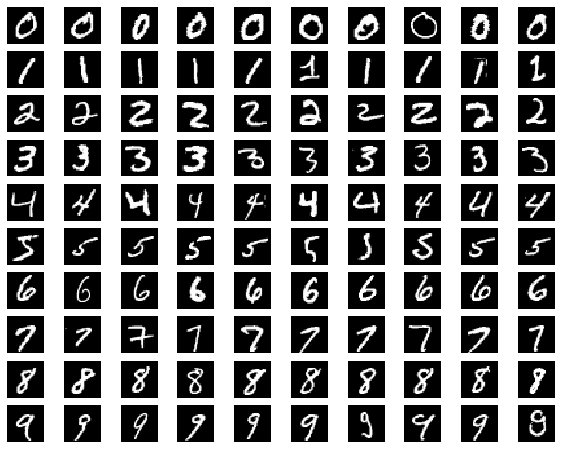

In [5]:
# Visualize 10 examples of 10 classes. You can extend the following code:
rows, cols = 10, 10
fig, axs = plt.subplots(nrows = rows, ncols = cols)

#
#
# ------- Your Code -------
#
#
nums = [10]*10
for idx, img in enumerate(x_trainval):
    if sum(nums) == 0:
        break
    j = y_trainval[idx]
    i = 10 - nums[j]
    if i > 9:
        continue
    axs[j, i].imshow(img.squeeze().numpy())
    axs[j ,i].axis('off')
    nums[j] -= 1
plt.savefig('fig1.pdf')   # Save the figures
plt.show()   # These should be some visualization of data at the end of this section

# You can see an output example in the follow:

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: *SVM* (25 points)

**Short description**: *fill this in*

### 2.1.1: Hyper-parameters

Define hyper-parameters for your model here

In [34]:
#
#
# ------- Your Code -------
#
#

degree = np.asarray([1,2,3]) # example


test_set = 'val'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

train_size = int(0.7 * len(x_trainval))
if test_set == 'val':
    train_idxs, val_idxs = slice(train_size), slice(train_size, -1)   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_val, y_val = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test



### 2.1.2: Data Preprocessing


In [35]:
#
#
# ------- Your Code -------
#
# e.g. normalize, flatten input data.
x_train = [x.squeeze(0).view(-1, 28*28) for x in x_train]
x_val = [x.squeeze(0).view(-1, 28*28) for x in x_val]
x_test = [x.squeeze(0).view(-1, 28*28) for x in x_test]

### 2.1.3: Model

Define your model here

In [52]:
# ------- Your Code -------
def train(model, optimizer, loss_f, scheduler, device=None, epochs=10):
    acc_list = []
    best_acc = 0
    best_model = './run/best_svm.pth'
    for epoch in tqdm(range(epochs)):
        train_loss = 0
        val_loss = 0
        train_acc = 0
        val_acc = 0
        
        start = time.time()
        # start training
        model.train()
        optimizer.zero_grad()
        
        i = 0
        for x, y in zip(x_train, y_train):
            i += 1
            x = x.to(device)
            output = model(x)
            # output = normalize(output, p=1.0)
            _, pred = torch.max(output, 1)
            # if i < 10:
            #     print(output, y, pred)
            # loss = loss_f(output[0][pred.item()], torch.tensor(-1))
            correct = output[:, y].unsqueeze(0)
            loss = loss_f(output, correct)
            loss = torch.sum(torch.max(loss, 1)[0])
            train_loss += loss
            train_acc += (pred == y)
            loss.backward()
            optimizer.step()
        scheduler.step()
            
        end = time.time()
        
        # start evalidation
        with torch.no_grad():
            model.eval()
            
            for x, y in zip(x_val, y_val):
                x = x.to(device)
                output = model(x)
                _, pred = torch.max(output, 1)
                correct = output[:, y].unsqueeze(0)
                loss = loss_f(output, correct)
                loss = torch.sum(torch.max(loss, 1)[0])
                val_loss += loss
                val_acc += (pred == y)
            if val_acc > best_acc:
                if not os.path.exists(os.path.dirname(best_model)):
                    os.makedirs(os.path.dirname(best_model))
                best_acc = val_acc
                best_epoch = epoch
                torch.save(model.state_dict(), best_model)
                
        acc_list.append(val_acc.item()/len(x_val))
        print("Epoch: {}, runtime: {:.4f}s".format(epoch, end-start))
        print("train_loss: {:.4f}, train_acc: {:.4f}\n"
              "val_loss: {:.4f}, val_acc: {:.4f}".format(train_loss.item()/len(x_train), train_acc.item()/len(x_train),\
                                                        val_loss/len(x_val), val_acc.item()/len(x_val)))
        print("best acc at epoch: {}".format(best_epoch))
    return acc_list

### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [53]:
# ------- Your Code -------
#  Please save the trained model

model = nn.Linear(28*28, 10).to(device)
# model = nn.Sequential(
#             nn.Linear(28*28, 10),
#             nn.sign()
#         )

# loss_f = nn.HingeEmbeddingLoss(reduction='sum')
loss_f = lambda output, correct : output - correct + 1.0 
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
acc_list = train(model, optimizer, loss_f, scheduler, device, 30)

  3%|▎         | 1/30 [00:02<00:59,  2.06s/it]

Epoch: 0, runtime: 1.7990s
train_loss: 1175.4455, train_acc: 0.5295
val_loss: 1989.6248, val_acc: 0.6852
best acc at epoch: 0


  7%|▋         | 2/30 [00:04<00:57,  2.05s/it]

Epoch: 1, runtime: 1.7908s
train_loss: 1591.7377, train_acc: 0.7376
val_loss: 2458.6008, val_acc: 0.6785
best acc at epoch: 0


 10%|█         | 3/30 [00:06<00:55,  2.06s/it]

Epoch: 2, runtime: 1.8049s
train_loss: 1955.9520, train_acc: 0.7167
val_loss: 2273.8499, val_acc: 0.6930
best acc at epoch: 2


 13%|█▎        | 4/30 [00:08<00:53,  2.07s/it]

Epoch: 3, runtime: 1.8326s
train_loss: 1357.0274, train_acc: 0.7824
val_loss: 1584.4631, val_acc: 0.7486
best acc at epoch: 3


 17%|█▋        | 5/30 [00:10<00:51,  2.06s/it]

Epoch: 4, runtime: 1.7769s
train_loss: 1067.2193, train_acc: 0.8114
val_loss: 1017.3004, val_acc: 0.8343
best acc at epoch: 4


 20%|██        | 6/30 [00:12<00:50,  2.12s/it]

Epoch: 5, runtime: 1.9139s
train_loss: 708.6443, train_acc: 0.8471
val_loss: 1198.4172, val_acc: 0.8076
best acc at epoch: 4


 23%|██▎       | 7/30 [00:14<00:49,  2.16s/it]

Epoch: 6, runtime: 1.9932s
train_loss: 831.8315, train_acc: 0.8552
val_loss: 1270.7714, val_acc: 0.7998
best acc at epoch: 4


 27%|██▋       | 8/30 [00:16<00:46,  2.12s/it]

Epoch: 7, runtime: 1.7628s
train_loss: 563.5968, train_acc: 0.8790
val_loss: 1052.9879, val_acc: 0.7964
best acc at epoch: 4


 30%|███       | 9/30 [00:18<00:43,  2.09s/it]

Epoch: 8, runtime: 1.7588s
train_loss: 494.7984, train_acc: 0.8862
val_loss: 839.3908, val_acc: 0.8576
best acc at epoch: 8


 33%|███▎      | 10/30 [00:20<00:41,  2.08s/it]

Epoch: 9, runtime: 1.8032s
train_loss: 393.9927, train_acc: 0.9119
val_loss: 670.5759, val_acc: 0.8565
best acc at epoch: 8


 37%|███▋      | 11/30 [00:22<00:39,  2.07s/it]

Epoch: 10, runtime: 1.7773s
train_loss: 320.9093, train_acc: 0.9167
val_loss: 596.6793, val_acc: 0.8966
best acc at epoch: 10


 40%|████      | 12/30 [00:25<00:37,  2.07s/it]

Epoch: 11, runtime: 1.8021s
train_loss: 291.6640, train_acc: 0.9286
val_loss: 594.7101, val_acc: 0.8699
best acc at epoch: 10


 43%|████▎     | 13/30 [00:27<00:35,  2.10s/it]

Epoch: 12, runtime: 1.9276s
train_loss: 277.0607, train_acc: 0.9262
val_loss: 550.2546, val_acc: 0.8954
best acc at epoch: 10


 47%|████▋     | 14/30 [00:29<00:34,  2.13s/it]

Epoch: 13, runtime: 1.9534s
train_loss: 259.0970, train_acc: 0.9362
val_loss: 571.0095, val_acc: 0.8788
best acc at epoch: 10


 50%|█████     | 15/30 [00:31<00:32,  2.18s/it]

Epoch: 14, runtime: 2.0228s
train_loss: 268.4678, train_acc: 0.9271
val_loss: 518.9243, val_acc: 0.8843
best acc at epoch: 10


 53%|█████▎    | 16/30 [00:33<00:30,  2.18s/it]

Epoch: 15, runtime: 1.9483s
train_loss: 238.6687, train_acc: 0.9352
val_loss: 506.2458, val_acc: 0.8921
best acc at epoch: 10


 57%|█████▋    | 17/30 [00:36<00:28,  2.18s/it]

Epoch: 16, runtime: 1.9036s
train_loss: 228.9124, train_acc: 0.9395
val_loss: 501.2491, val_acc: 0.8910
best acc at epoch: 10


 60%|██████    | 18/30 [00:38<00:25,  2.12s/it]

Epoch: 17, runtime: 1.7178s
train_loss: 223.2403, train_acc: 0.9414
val_loss: 495.6361, val_acc: 0.8899
best acc at epoch: 10


 63%|██████▎   | 19/30 [00:39<00:22,  2.07s/it]

Epoch: 18, runtime: 1.7234s
train_loss: 220.0816, train_acc: 0.9424
val_loss: 496.3067, val_acc: 0.8921
best acc at epoch: 10


 67%|██████▋   | 20/30 [00:41<00:20,  2.05s/it]

Epoch: 19, runtime: 1.7433s
train_loss: 218.4052, train_acc: 0.9419
val_loss: 497.5734, val_acc: 0.8921
best acc at epoch: 10


 70%|███████   | 21/30 [00:43<00:18,  2.03s/it]

Epoch: 20, runtime: 1.7321s
train_loss: 217.3025, train_acc: 0.9429
val_loss: 499.1301, val_acc: 0.8910
best acc at epoch: 10


 73%|███████▎  | 22/30 [00:46<00:16,  2.03s/it]

Epoch: 21, runtime: 1.7830s
train_loss: 215.7943, train_acc: 0.9429
val_loss: 499.0286, val_acc: 0.8910
best acc at epoch: 10


 77%|███████▋  | 23/30 [00:48<00:14,  2.02s/it]

Epoch: 22, runtime: 1.7518s
train_loss: 215.6878, train_acc: 0.9429
val_loss: 498.9264, val_acc: 0.8910
best acc at epoch: 10


 80%|████████  | 24/30 [00:50<00:12,  2.02s/it]

Epoch: 23, runtime: 1.7474s
train_loss: 215.5812, train_acc: 0.9429
val_loss: 498.8265, val_acc: 0.8921
best acc at epoch: 10


 83%|████████▎ | 25/30 [00:52<00:10,  2.02s/it]

Epoch: 24, runtime: 1.7617s
train_loss: 215.4669, train_acc: 0.9429
val_loss: 498.6457, val_acc: 0.8921
best acc at epoch: 10


 87%|████████▋ | 26/30 [00:54<00:08,  2.03s/it]

Epoch: 25, runtime: 1.8235s
train_loss: 215.3477, train_acc: 0.9433
val_loss: 498.5604, val_acc: 0.8921
best acc at epoch: 10


 90%|█████████ | 27/30 [00:56<00:06,  2.04s/it]

Epoch: 26, runtime: 1.7939s
train_loss: 215.2468, train_acc: 0.9429
val_loss: 498.4634, val_acc: 0.8921
best acc at epoch: 10


 93%|█████████▎| 28/30 [00:58<00:04,  2.07s/it]

Epoch: 27, runtime: 1.8029s
train_loss: 215.1317, train_acc: 0.9433
val_loss: 498.3784, val_acc: 0.8921
best acc at epoch: 10


 97%|█████████▋| 29/30 [01:00<00:02,  2.07s/it]

Epoch: 28, runtime: 1.8092s
train_loss: 214.9903, train_acc: 0.9433
val_loss: 498.3782, val_acc: 0.8921
best acc at epoch: 10


100%|██████████| 30/30 [01:02<00:00,  2.08s/it]

Epoch: 29, runtime: 1.8843s
train_loss: 214.9854, train_acc: 0.9433
val_loss: 498.3782, val_acc: 0.8921
best acc at epoch: 10


### 2.1.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [62]:
#
#
# ------- Your Code -------
#
# Example: y_pred = model.predict(x)
y_pred = []
model.load_state_dict(torch.load('./run/best_svm.pth'))
with torch.no_grad():
    acc = 0
    for x, y in zip(x_test, y_test):
        x = x.to(device)
        output = model(x)
        _, pred = torch.max(output, 1)
        y_pred.append(pred.cpu().item())
        acc += (pred == y)
    print("accuracy on test set: {:.4f}".format(acc.item()/len(x_test)))

accuracy on test set: 0.8621


In [ ]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

# Example: plot_scores(parameters, scores, "title", "x_label", "y_label"), 

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.

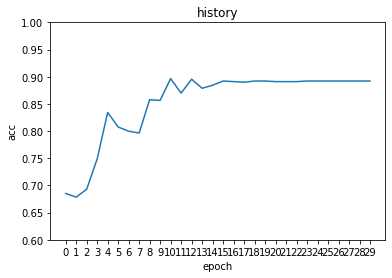

In [56]:
# Here report the score for the best model
#
# ------- Your Code -------
plot_scores(list(range(30)), acc_list, 'history', 'epoch', 'acc')

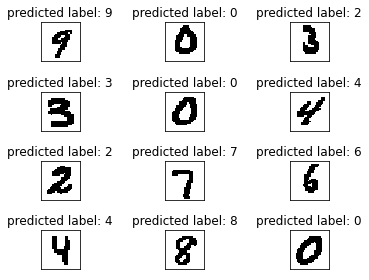

In [66]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
x_test_numpy = [x.numpy() for x in x_test]
vis_predictions(x_test_numpy, y_pred, len(x_test))


### 2.1.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?  
 Ans: Learning rate for optimizer, at first I set it too large (0.01), which led to huge weight adjustment and 
 cause almost all images been categoried to one class.
 * What were other design choices you faced?  
 Ans: This is my first choice, further choice could be bayes classifier.
 * Any other interesting insights  
 Ans: Because I would like to implement all models with pytorch, I used Linear module for SVM, and 
 it is not so straight-forward enough to come up with the loss function for the outputs. Here I chose to implement hinge 
 loss like this: after getting output with size 10, compute $loss = \max\{output^{(10)} - (output[i], \cdots, output[i])^{(10)} + margin^{(10)}, 1\}$
 , where $i$ is the correct class. 

# 2.2: Model [M2]: *kNN* (25 points)




### 2.2.1: Hyper-parameters

Define hyper-parameters for your method here

In [5]:
#
#
# ------- Your Code -------
#
#

degree = np.asarray([1,2,3]) # example

# You don't need the following code, if you can use data from 2.1.1.

test_set = 'test'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

if test_set == 'val':
    train_idxs, val_idxs = ..., ...   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.2.2: Data Preprocessing


In [6]:
#
#
# ------- Your Code -------
#
# e.g. normalize, flatten input data.

x_train_1d = [x.squeeze(0).view(-1) for x in x_train]
x_test_1d = [x.squeeze(0).view(-1) for x in x_eval]

x_train_tensor = torch.stack(x_train_1d)
y_train_tensor = torch.stack(y_train)

x_test_tensor = torch.stack(x_test_1d)
y_test_tensor = torch.stack(y_eval)


### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1)

In [16]:
#
#
# ------- Your Code -------
class KNN():
    def __init__(self, X, Y, k):
        # train set for compare distance with test
        self.x_ = X.to(device)
        self.y_ = Y.to(device)
        self.k = k
        self.size_ = self.x_.shape[0]
        
    def predict(self, X, Y):
        # test set
        start = time.time()
        self.x = X.to(device)
        self.y = Y.to(device)
        self.size = self.x.shape[0]
#         print(self.size, self.size_)
        
        pow_x = torch.pow(self.x, 2).sum(1, keepdim=True).expand(self.size, self.size_)
        pow_x_ = torch.pow(self.x_, 2).sum(1, keepdim=True).expand(self.size_, self.size).transpose(0, 1)
        
        # distance matrix d_mat[i, j] = distance(x_test[i], x_train[j])
        d_mat = pow_x + pow_x_ - 2 * torch.matmul(self.x, self.x_.transpose(0, 1))
        orders = torch.argsort(d_mat)
        y_pred = []
        for order in orders:
            y_pred.append(np.bincount([self.y_[i] for i in order[:self.k]]).argmax())
        end = time.time()
        acc = torch.sum(torch.tensor(y_pred) == self.y.cpu()).item() / self.size
        print('k: {}, runtime: {:.4f}s'.format(k, end - start))
        print('accuracy on test set: {}'.format(acc))
        return y_pred, acc
        
        

### 2.2.4: Fit Model


In [29]:
# ------- Your Code -------

best_k = 0
best_acc = 0
best_pred = None
acc_list = []
for k in range(1, 30):
    knn = KNN(x_train_tensor, y_train_tensor, k)
    y_pred, acc = knn.predict(x_test_tensor, y_test_tensor)
    acc_list.append(acc)
    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_pred = y_pred
    print('best acc when k={}'.format(best_k))
# torch.pow(a, 2).sum(1, keepdim=True).expand(4,3).transpose(0, 1)

k: 1, runtime: 1.0743s
accuracy on test set: 0.9191
best acc when k=1
k: 2, runtime: 1.3500s
accuracy on test set: 0.903
best acc when k=1
k: 3, runtime: 1.5814s
accuracy on test set: 0.9168
best acc when k=1
k: 4, runtime: 1.8270s
accuracy on test set: 0.9147
best acc when k=1
k: 5, runtime: 2.0495s
accuracy on test set: 0.9168
best acc when k=1
k: 6, runtime: 2.3708s
accuracy on test set: 0.9136
best acc when k=1
k: 7, runtime: 2.6123s
accuracy on test set: 0.9129
best acc when k=1
k: 8, runtime: 2.7854s
accuracy on test set: 0.9102
best acc when k=1
k: 9, runtime: 3.0557s
accuracy on test set: 0.9105
best acc when k=1
k: 10, runtime: 3.3535s
accuracy on test set: 0.9082
best acc when k=1
k: 11, runtime: 3.6252s
accuracy on test set: 0.9059
best acc when k=1
k: 12, runtime: 3.7934s
accuracy on test set: 0.9048
best acc when k=1
k: 13, runtime: 4.1104s
accuracy on test set: 0.9031
best acc when k=1
k: 14, runtime: 4.2982s
accuracy on test set: 0.9017
best acc when k=1
k: 15, runtime: 

### 2.2.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot score (accuracy) for each model using "plot_scores" function
  * Report the score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [ ]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

# Example: plot_scores(parameters, scores, "title", "x_label", "y_label"), 

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.

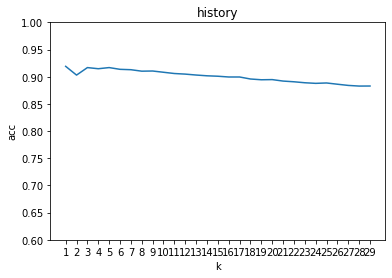

In [30]:
# Here report the score for the best model
#
# ------- Your Code -------
plot_scores(list(range(1, 30)), acc_list, 'history', 'k', 'acc')

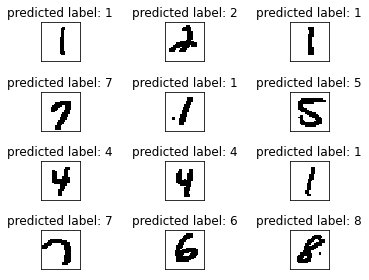

In [33]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
# ------- Your Code -------
x_test_numpy = x_test_tensor.numpy()
vis_predictions(x_test_numpy, best_pred, len(x_test_numpy))

### 2.2.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?   
 Ans: Not really, I tend to choose smaller k and it worked fine.
 * What were other design choices you faced?  
 Ans: Here I use kNN for the algorithm itself is easy to follow, other choice could be K-means.
 * Any other interesting insights.  
 Ans: The larger k becomes, the worse the accuracy we get. It is recommended to choose $k=5$ at here.

# 2.3: Model [M3] (Neural Networks): *CNN* (25 points)



### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [35]:
#
#
# ------- Your Code -------
#
#
batch_size_train = 64 # Fill in
batch_size_test = 16 # Fill in
n_epochs = 20 # Fill in
# other parameters ...


# You don't need the following code, if you can use data from 2.1.1.
# You can also use torch built-in functions (torch.utils.data)

test_set = 'val'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

if test_set == 'val':
    train_size = int(len(x_trainval) * 0.7)
    train_idxs, val_idxs = slice(train_size), slice(train_size, -1)   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.3.2: Data Preprocessing


In [29]:

# ------- Your Code -------
# e.g. normalize, flatten input data.

x_train_tensor = torch.stack(x_train)
y_train_tensor = torch.stack(y_train)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size_train)

x_val_tensor = torch.stack(x_eval)
y_val_tensor = torch.stack(y_eval)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size_test)

x_test_tensor = torch.stack(x_test)
y_test_tensor = torch.stack(y_test)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size_test)


### 2.3.3: Model

Define your model here

In [33]:
class Net(nn.Module):
    # ------- Your Code -------
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(14*14*128, 256),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256, 10)
        )
    def forward(self, inputs):
        x = self.conv(inputs)
        x = x.view(-1, 14*14*128)
        x = self.classifier(x)
        return x
        

### 2.2.4: Fit Model


In [48]:

# ------- Your Code -------
# Example: net = Net(), ....
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-4)
loss_f = nn.CrossEntropyLoss(reduction='sum').to(device)
history = train(net, optimizer, loss_f, device, n_epochs)

  5%|▌         | 1/20 [00:08<02:42,  8.56s/it]

Epoch: 0, runtime: 8.5639s
train_loss: 0.5474, train_acc: 0.8416
val_loss: 0.1943, val_acc: 0.9477
best acc at epoch 0


 10%|█         | 2/20 [00:17<02:34,  8.57s/it]

Epoch: 1, runtime: 8.5803s
train_loss: 0.1529, train_acc: 0.9573
val_loss: 0.1130, val_acc: 0.9647
best acc at epoch 1


 15%|█▌        | 3/20 [00:38<04:01, 14.20s/it]

Epoch: 2, runtime: 20.9030s
train_loss: 0.0800, train_acc: 0.9753
val_loss: 0.0785, val_acc: 0.9767
best acc at epoch 2


 20%|██        | 4/20 [00:46<03:12, 12.02s/it]

Epoch: 3, runtime: 8.6770s
train_loss: 0.0642, train_acc: 0.9806
val_loss: 0.0699, val_acc: 0.9798
best acc at epoch 3


 25%|██▌       | 5/20 [00:55<02:40, 10.71s/it]

Epoch: 4, runtime: 8.3748s
train_loss: 0.0430, train_acc: 0.9876
val_loss: 0.0833, val_acc: 0.9797
best acc at epoch 3


 30%|███       | 6/20 [01:03<02:18,  9.91s/it]

Epoch: 5, runtime: 8.3741s
train_loss: 0.0452, train_acc: 0.9856
val_loss: 0.0920, val_acc: 0.9739
best acc at epoch 3


 35%|███▌      | 7/20 [01:11<02:02,  9.41s/it]

Epoch: 6, runtime: 8.3761s
train_loss: 0.0652, train_acc: 0.9832
val_loss: 0.1562, val_acc: 0.9654
best acc at epoch 3


 40%|████      | 8/20 [01:20<01:49,  9.16s/it]

Epoch: 7, runtime: 8.6129s
train_loss: 0.0500, train_acc: 0.9850
val_loss: 0.0751, val_acc: 0.9821
best acc at epoch 7


 45%|████▌     | 9/20 [01:28<01:38,  8.91s/it]

Epoch: 8, runtime: 8.3765s
train_loss: 0.0358, train_acc: 0.9900
val_loss: 0.0728, val_acc: 0.9820
best acc at epoch 7


 50%|█████     | 10/20 [01:37<01:28,  8.81s/it]

Epoch: 9, runtime: 8.5792s
train_loss: 0.0331, train_acc: 0.9915
val_loss: 0.0776, val_acc: 0.9829
best acc at epoch 9


 55%|█████▌    | 11/20 [01:45<01:18,  8.68s/it]

Epoch: 10, runtime: 8.3754s
train_loss: 0.0296, train_acc: 0.9924
val_loss: 0.1002, val_acc: 0.9819
best acc at epoch 9


 60%|██████    | 12/20 [01:54<01:08,  8.58s/it]

Epoch: 11, runtime: 8.3660s
train_loss: 0.0277, train_acc: 0.9920
val_loss: 0.1185, val_acc: 0.9762
best acc at epoch 9


 65%|██████▌   | 13/20 [02:02<00:59,  8.52s/it]

Epoch: 12, runtime: 8.3809s
train_loss: 0.0312, train_acc: 0.9910
val_loss: 0.0989, val_acc: 0.9817
best acc at epoch 9


 70%|███████   | 14/20 [02:11<00:51,  8.53s/it]

Epoch: 13, runtime: 8.5609s
train_loss: 0.0311, train_acc: 0.9920
val_loss: 0.1091, val_acc: 0.9829
best acc at epoch 13


 75%|███████▌  | 15/20 [02:19<00:42,  8.54s/it]

Epoch: 14, runtime: 8.5523s
train_loss: 0.0258, train_acc: 0.9934
val_loss: 0.0850, val_acc: 0.9832
best acc at epoch 14


 80%|████████  | 16/20 [02:28<00:34,  8.55s/it]

Epoch: 15, runtime: 8.5664s
train_loss: 0.0211, train_acc: 0.9940
val_loss: 0.0984, val_acc: 0.9840
best acc at epoch 15


 85%|████████▌ | 17/20 [02:36<00:25,  8.55s/it]

Epoch: 16, runtime: 8.5542s
train_loss: 0.0190, train_acc: 0.9953
val_loss: 0.0874, val_acc: 0.9851
best acc at epoch 16


 90%|█████████ | 18/20 [02:50<00:19,  9.99s/it]

Epoch: 17, runtime: 13.3364s
train_loss: 0.0134, train_acc: 0.9961
val_loss: 0.0891, val_acc: 0.9851
best acc at epoch 17


 95%|█████████▌| 19/20 [02:58<00:09,  9.51s/it]

Epoch: 18, runtime: 8.3799s
train_loss: 0.0218, train_acc: 0.9945
val_loss: 0.1175, val_acc: 0.9818
best acc at epoch 17


100%|██████████| 20/20 [03:06<00:00,  9.34s/it]

Epoch: 19, runtime: 8.3539s
train_loss: 0.0224, train_acc: 0.9939
val_loss: 0.0887, val_acc: 0.9817
best acc at epoch 17


In [47]:
def train(model, optimizer, loss_f, device, epochs):
    # ------- Your Code -------
    history = []
    best_model_dir = './run/best.pth'
    best_tp = 0
    best_epoch = 0
    
    for epoch in tqdm(range(epochs)):
        train_loss = 0
        train_tp = 0
        model.train()
        optimizer.zero_grad()
        
        
        start = time.time()
        for x, y in train_dataloader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, pred = torch.max(output, 1)
            loss = loss_f(output, y)
            # accumulate train_loss and correct_pred
            train_tp += torch.sum(pred == y).item()
            train_loss += loss.item()
            # get average
            avg_train_loss = train_loss / len(train_dataset)
            train_acc = train_tp / len(train_dataset)
            loss.backward()
            optimizer.step()
            
        val_loss = 0
        val_tp = 0
        with torch.no_grad():
            model.eval()
            for x, y in val_dataloader:
                x = x.to(device)
                y = y.to(device)
                output = model(x)
                _, pred = torch.max(output, 1)
                loss = loss_f(output, y)
                # accumulate train_loss and correct_pred
                val_tp += torch.sum(pred == y).item()
                val_loss += loss.item()
                # get average
                avg_val_loss = val_loss / len(val_dataset)
                val_acc = val_tp / len(val_dataset)
                
            if val_tp > best_tp:
                if not os.path.exists(os.path.dirname(best_model_dir)):
                    os.makedirs(os.path.dirname(best_model_dir))
                torch.save(model.state_dict(), best_model_dir)
                best_tp = val_tp
                best_epoch = epoch
        end = time.time()
        history.append([avg_train_loss, avg_val_loss, train_acc, val_acc])
        print('Epoch: {}, runtime: {:.4f}s'.format(epoch, end-start))
        print('train_loss: {:.4f}, train_acc: {:.4f}\n'
              'val_loss: {:.4f}, val_acc: {:.4f}'.format(avg_train_loss, train_acc,\
                                                         avg_val_loss, val_acc))
        print('best acc at epoch {}'.format(best_epoch))
    return history

In [71]:
def test(model, device):
    # ------- Your Code -------
    
    with torch.no_grad():
        tp = 0
        y_pred = torch.randn(1, 1)
        model.eval()
        for x, y in test_dataloader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, pred = torch.max(output, 1)
            # get correct_pred
            tp += torch.sum(pred == y).item()
            y_pred = torch.cat((y_pred, pred.unsqueeze(0).cpu()), 1)
        
        acc = tp / len(test_dataset)    
        print('accurary on test dataset: {}'.format(acc))
        
        return y_pred[0, 1:]

In [ ]:
# Save your model using torch.save()

### 2.2.5: Evaluation

Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

In [ ]:
# Here plot epoch (# passes over training data) and loss
#
# ------- Your Code -------


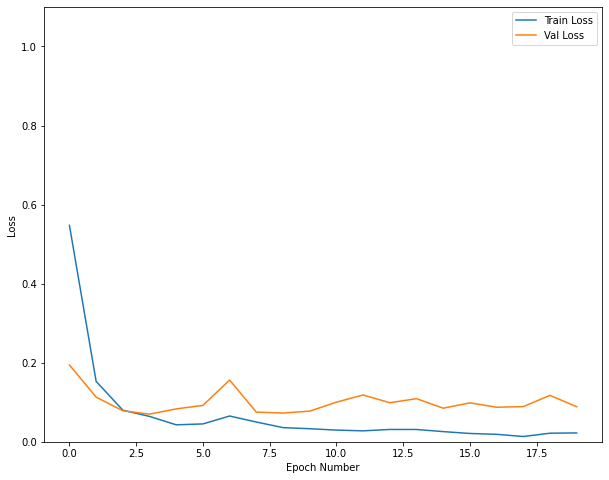

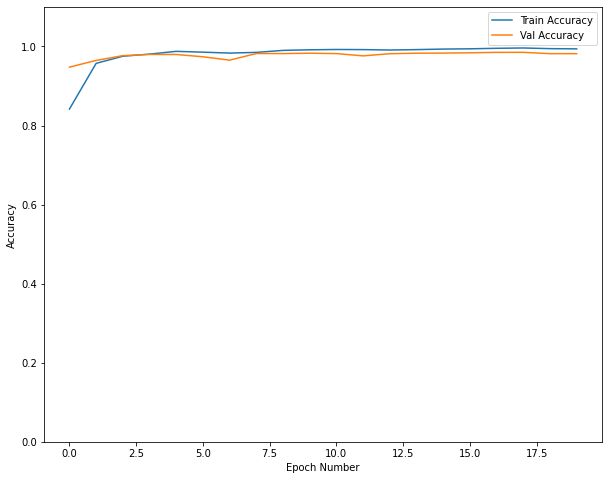

In [50]:
# Here plot epoch and accuracy over val/test set
#
# ------- Your Code -------
plot_history(history)

In [ ]:
#
#
# ------- Your Code -------
# Example:
# net = Net()
# net.load_state_dict(torch.load("PATH"))

In [76]:
# Here report the score for the best model
#
# ------- Your Code -------
net = Net().to(device)
net.load_state_dict(torch.load('./run/best.pth'))
y_pred = test(net, device)

accurary on test dataset: 0.987


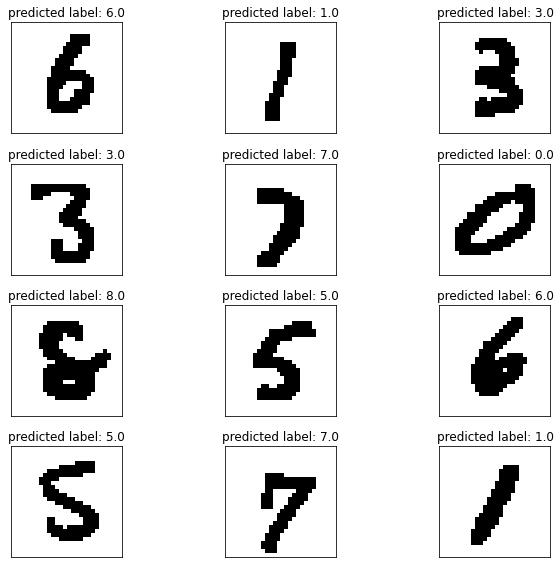

In [77]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
y_pred_list = y_pred.tolist()
x_test_numpy = [x.numpy() for x in x_test]
vis_predictions(x_test_numpy, y_pred_list, len(x_test))

### 2.3.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?  
 Ans: the classifier after convolution layers, before I forget to add one more linear
 layer after ReLU, which results in quite poor performance.
 * What were other design choices you faced?  
 Ans: ResNet, and many other deep learning model.
 * Any other interesting insights  
 Ans: It is sufficient enough to achieve high accuracy using only one convolutional layer for this task, probably because of the simplicity of the input data,
 since there is only one channel of the input images and it is digit-composed.

# 3. Summary (20 points)

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend to perform digit classification and why?

Feel free to discuss other insightful observations.

| _ | SVM | KNN | CNN |
| --- | --- | --- | --- |
| accuracy | worst 0.86 | not bad 0.92 | best 0.98 | 
| runtime | faster than CNN | slow due to mat-mul operation | medium |


I would recommend CNN, mainly because of the high accuracy the model could provide, and considering runtime,
it is acceptable.